# Convolutional Neural Networks (CNN) for MNIST dataset
The examples in this notebook assume that you are familiar with the theory of the neural networks. To learn more about the neural networks, you can refer resources in the readme file.

In this notebook, we will learn to:
* define a simple convolutional neural network (CNN)
* increase complexity of the CNN by adding multiple convolution and dense layers
* add dropout layer
* add batch normalization

## Import  modules

In [1]:
# Use GPU for Theano, comment to use CPU instead of GPU
# Tensorflow uses GPU by default
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN, device=gpu, floatX=float32"

In [2]:
# If using tensorflow, set image dimensions order
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

Using TensorFlow backend.


In [3]:
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
% matplotlib inline
np.random.seed(2017)  

## Load MNIST Dataset  

In [4]:
from keras.datasets import mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
_, img_rows, img_cols =  train_features.shape
num_classes = len(np.unique(train_labels))
num_input_nodes = img_rows*img_cols
print "Number of training samples: %d"%train_features.shape[0]
print "Number of test samples: %d"%test_features.shape[0]
print "Image rows: %d"%train_features.shape[1]
print "Image columns: %d"%train_features.shape[2]
print "Number of classes: %d"%num_classes

Number of training samples: 60000
Number of test samples: 10000
Image rows: 28
Image columns: 28
Number of classes: 10


## Pre-processing

In [5]:
train_features = train_features.reshape(train_features.shape[0], 1, img_rows, img_cols).astype('float32')
test_features = test_features.reshape(test_features.shape[0], 1, img_rows, img_cols).astype('float32')
train_features /= 255
test_features /= 255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## Function to plot model accuracy and loss 

In [6]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

## Funtion to compute test accuracy

In [7]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

## A Simple CNN

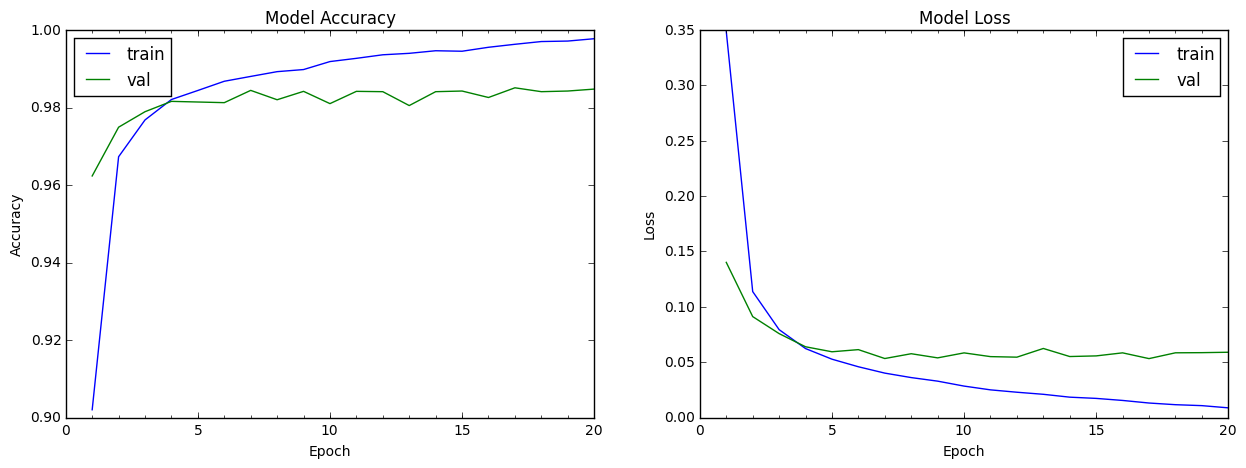

Model took 75.61 seconds to train
Accuracy on test data is: 98.68


In [8]:
# Define the model
model1 = Sequential()
model1.add(Convolution2D(32, 5, 5, border_mode='valid', input_shape=(1, 28, 28))) 
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(num_classes))
model1.add(Activation("softmax"))
# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model1_info = model1.fit(train_features, train_labels, batch_size=128, \
                         nb_epoch=20, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model1_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1)

## Observation:
CNN performed better than the neural networks [here](https://github.com/parneetk/Neural-Networks-in-Keras/blob/master/01_neural_networks.ipynb).

## Increase network depth by adding multiple layers

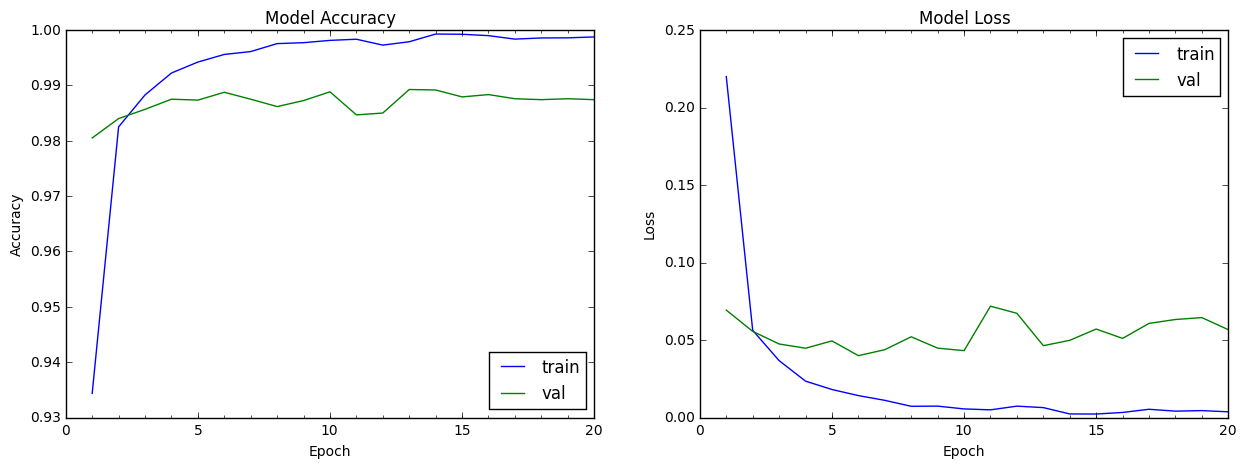

Model took 137.12 seconds to train
Accuracy on test data is: 98.78


In [9]:
# Define the model
model3 = Sequential()
model3.add(Convolution2D(32, 3, 3, border_mode='valid', input_shape=(1, 28, 28)))
model3.add(Activation("relu"))
model3.add(Convolution2D(32, 3, 3,  border_mode='valid'))
model3.add(Activation("relu"))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation("relu"))
model3.add(Dense(num_classes))
model3.add(Activation("softmax"))
# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model3_info = model3.fit(train_features, train_labels, batch_size=128, \
                         nb_epoch=20, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model3_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model3)

## Observation:
Increasing network depth, increased the test accuracy but also increased the training time.

## Add Droput Layer

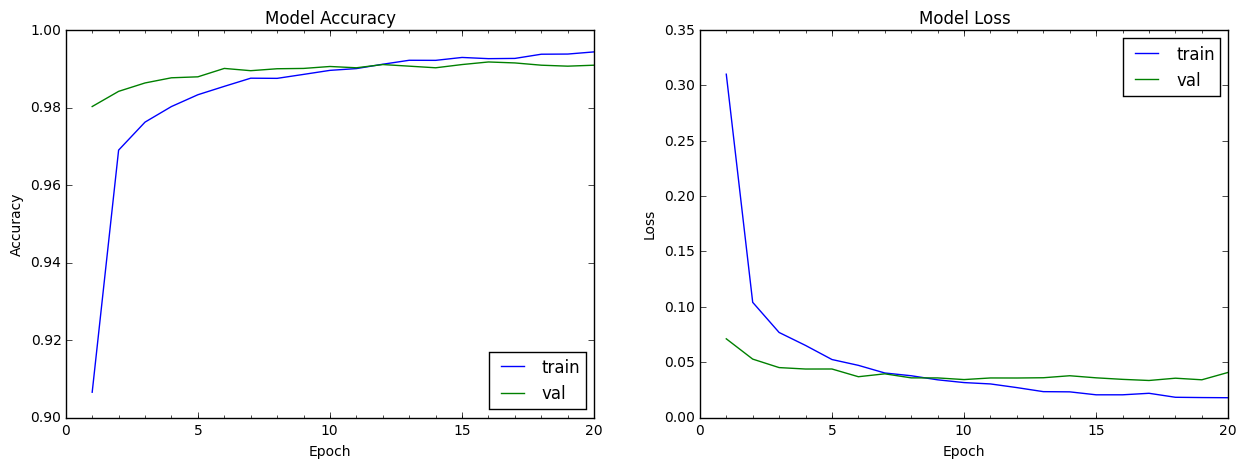

Model took 141.79 seconds to train
Accuracy on test data is: 99.21


In [10]:
# Define the model
model4 = Sequential()
model4.add(Convolution2D(32, 3, 3, border_mode='valid', input_shape=(1, 28, 28)))
model4.add(Activation("relu"))
model4.add(Convolution2D(32, 3, 3,  border_mode='valid'))
model4.add(Activation("relu"))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(128))
model4.add(Dropout(0.5))
model4.add(Activation("relu"))
model4.add(Dense(num_classes))
model4.add(Activation("softmax"))
# Compile the model
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model4_info = model4.fit(train_features, train_labels, batch_size=128, \
                         nb_epoch=20, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model4_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model4)

## Observation:
Adding the droput layer increases the test accuracy while increasing the training time. Dropout layer adds regularization to the network by preventing weights to converge at the same position. During forward propagation, nodes are turned off randomly while all nodes are turned on during forward propagartion. Read more about dropoout layer [here](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf).

## Add Batch Normalization

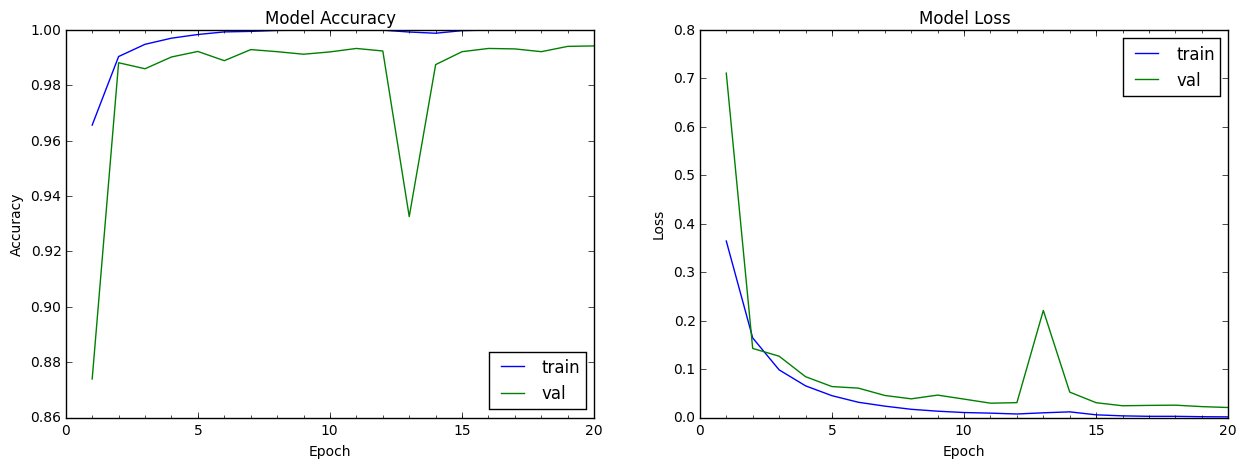

Model took 182.42 seconds to train
Accuracy on test data is: 99.30


In [11]:
# Define the model
model5 = Sequential()
model5.add(Convolution2D(32, 3, 3, border_mode='valid', input_shape=(1, 28, 28)))
model5.add(BatchNormalization())
model5.add(Activation("relu"))
model5.add(Convolution2D(32, 3, 3,  border_mode='valid'))
model5.add(BatchNormalization())
model5.add(Activation("relu"))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Flatten())
model5.add(Dense(128))
model5.add(BatchNormalization())
model5.add(Activation("relu"))
model5.add(Dense(num_classes))
model5.add(BatchNormalization())
model5.add(Activation("softmax"))
# model5 the model
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model5_info = model5.fit(train_features, train_labels, batch_size=128, \
                         nb_epoch=20, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model5_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model5)

## Observation:
Adding the batch normalization increases the test accuracy while increasing the training time. It normalizes the network input weights between 0 and 1. This allows using higher learning rates when using SGD and for some datasets, eliminates the need for dropout layer. Read more about batch normalization [here](http://jmlr.org/proceedings/papers/v37/ioffe15.pdf). 